**Flight Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl


     |████████████████████████████████| 242 kB 596 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_train=pd.read_excel("../input/flight-fare-prediction-mh/Data_Train.xlsx")



In [4]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
# To display all the columns 
pd.set_option("display.max_columns",None)

In [6]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_train["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [9]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#There is two Nan value. So we have to drop it

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
# Date_of_Journey column is in object format.
# So we have to change it datetime format

df_train['Journey_day']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
df_train['Journey_month']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [14]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# Now we don't need Date_of_Journey	 column as we made two column from it.
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [16]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# similary we get hour and minitue from "Dep_Time" column
df_train['Dep_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Dep_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute

# Now we don't need "Dep_Time" column as we made two column from it.
df_train.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
#like previously we will convert "Arrival_Time" column into datetime format.

In [20]:
df_train['Arrival_Hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_Minute']=pd.to_datetime(df_train.Arrival_Time).dt.minute

# Now we don't need "Arrival_Time" column as we made two column from it.
df_train.drop(["Arrival_Time"],axis=1,inplace=True)

In [21]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
#"Duration" column format is not in datetime format.
#Duration value is like 2h 50m 
#So we have to change this for analysis.

In [23]:
duration=list(df_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2: # checking if there is only hour ot min
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+"0m" #if only hour is there, add 0 min
        else:
            duration[i]="0h"+duration[i]   ##if only minute is there, add 0 hour


duration_Hour=[]
duration_Minute=[]
for i in range(len(duration)):
    duration_Hour.append(int(duration[i].split(sep="h")[0]))
    duration_Minute.append(int(duration[i].split(sep="h")[1].split("m")[0]))

In [24]:
df_train["Duration_Hour"]=duration_Hour
df_train["Duration_Minute"]=duration_Minute

#Now we don't need "Duration" column as we made two column from it.
df_train.drop(["Duration"],axis=1,inplace=True)

In [25]:
df_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo,SpiceJet,Jet Airways,Jet Airways,Jet Airways,Multiple carriers
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore,Kolkata,Banglore,Banglore,Banglore,Delhi
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi,Banglore,New Delhi,New Delhi,New Delhi,Cochin
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL,CCU → BLR,BLR → BOM → DEL,BLR → BOM → DEL,BLR → BOM → DEL,DEL → BOM → COK
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop,non-stop,1 stop,1 stop,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info,No info,In-flight meal not included,No info,In-flight meal not included,No info
Price,3897,7662,13882,6218,13302,3873,11087,22270,11087,8625
Journey_day,24,1,9,12,1,24,12,1,12,27
Journey_month,3,5,6,5,3,6,3,3,3,5
Dep_Hour,22,5,9,18,16,9,18,8,8,11


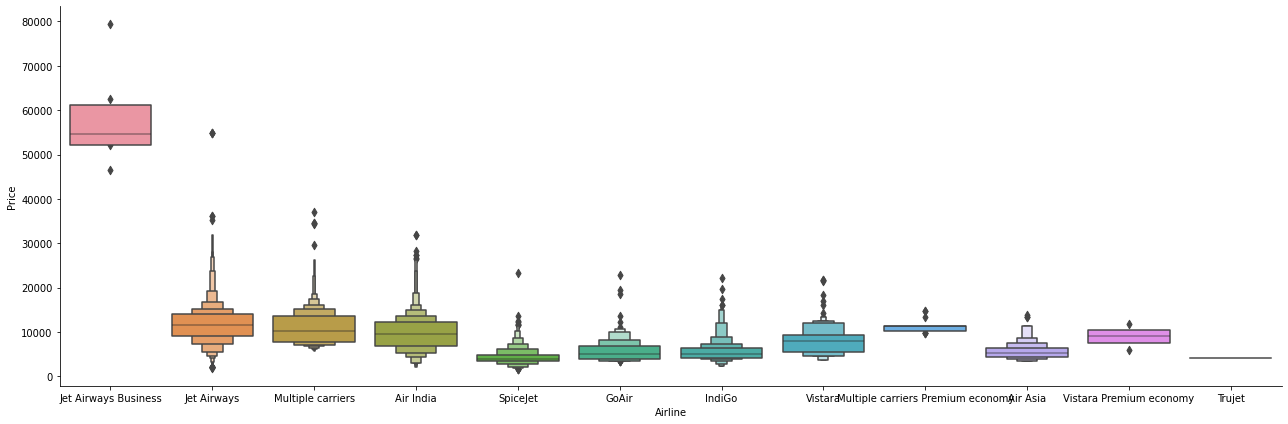

In [26]:
# Airlines vs Price Plot
sns.catplot(x="Airline",y="Price",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [27]:
# Airline is Categorical data. 
#It's a Nominal data which has no order
# In Nominal data, we do OneHotEncoding
Airline=df_train["Airline"]
Airline=pd.get_dummies(Airline)

In [28]:
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

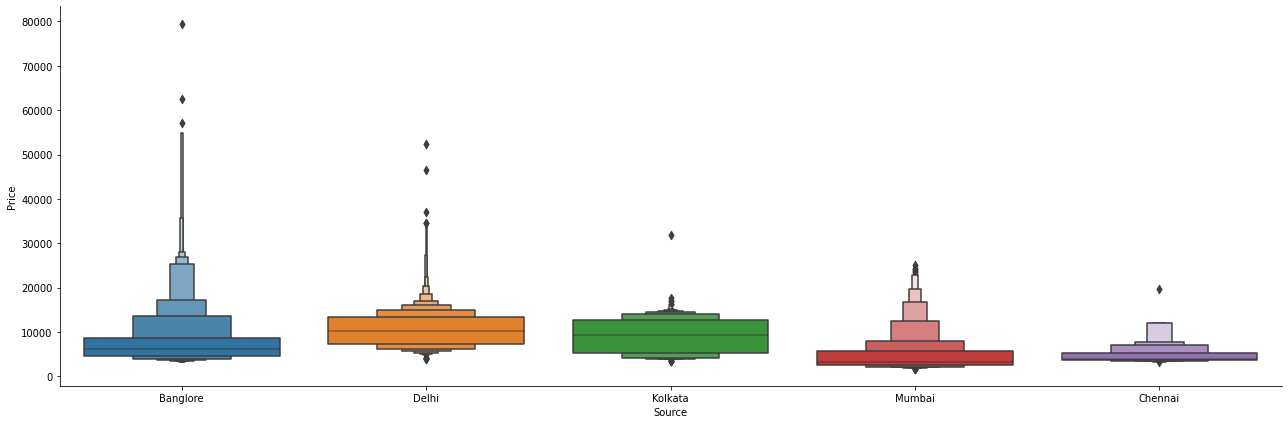

In [30]:
# Source vs Price Plot
sns.catplot(x="Source",y="Price",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [31]:
# Source is Categorical data. 
#It's a Nominal data which has no order
# In Nominal data, we do OneHotEncoding
Source=df_train[["Source"]]
Source=pd.get_dummies(Source)

In [32]:
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [33]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

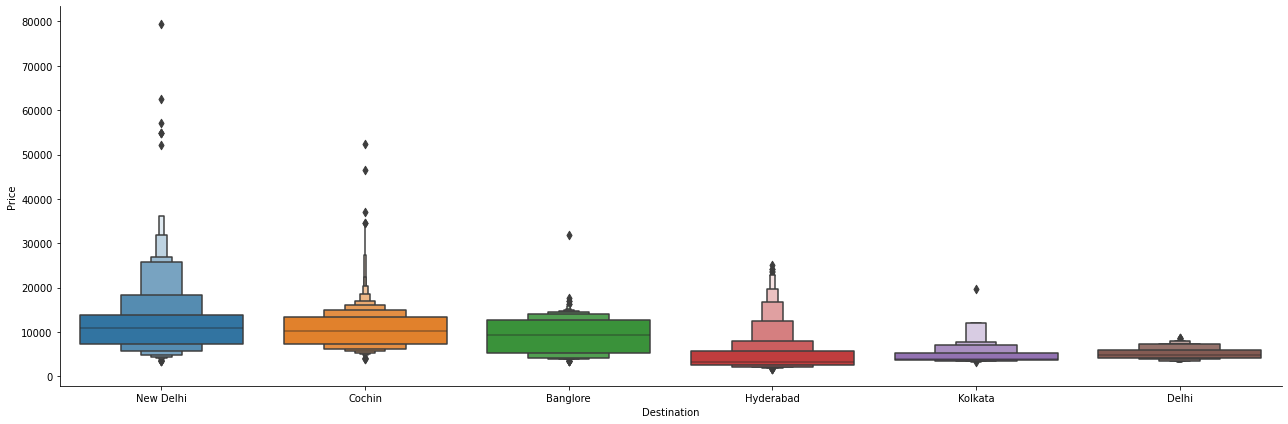

In [34]:
# Destination vs Price Plot
sns.catplot(x="Destination",y="Price",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [35]:
# Destination is Categorical data. 
#It's a Nominal data which has no order
# In Nominal data, we do OneHotEncoding
Destination=df_train[["Destination"]]
Destination=pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [36]:
df_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
df_train["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [38]:
# we notice here that "Route" & "Total_Stops" are interrelated.
# So we can drop "Route" column.
# Aslo we can drop "Additional_Info" column as it contains nothing.
df_train["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [39]:
df_train.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [40]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [41]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

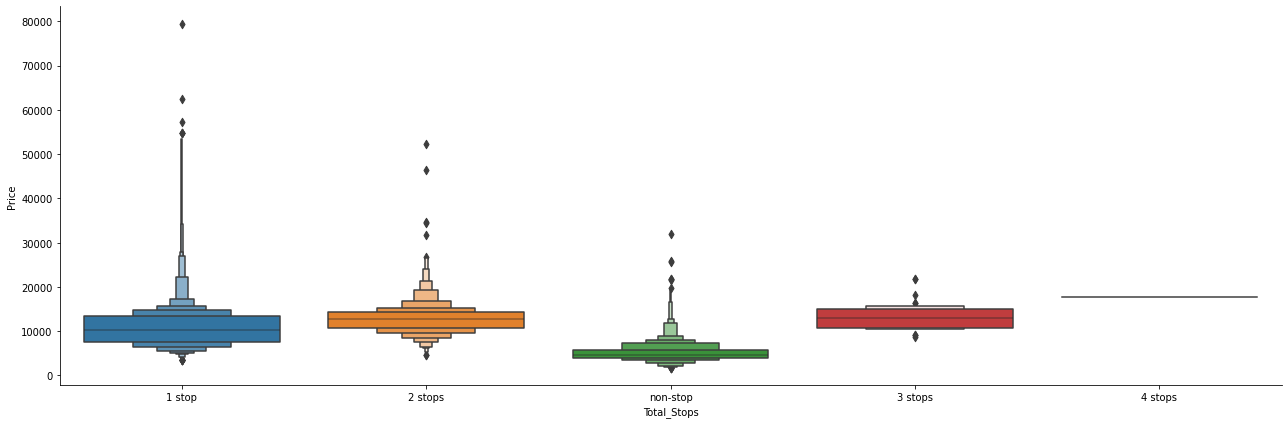

In [42]:
# Total_Stops vs Price Plot
sns.catplot(x="Total_Stops",y="Price",data=df_train.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [43]:
# Total_Stops is Ordinal Data 
# So we will do LabelEncoding
df_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [44]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [45]:
final_train=pd.concat([df_train,Airline,Source,Destination],axis=1)
final_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [46]:
# Here "Airline",	"Source"	& "Destination" columns are repeating.
# So we can drop these three columns.
final_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
final_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [47]:
final_train.shape

(10682, 33)

Now we will be doing same step with Test data.But We can't do these step by combining Train and Test dataset. Beacause of **data leakage**.
If we combine Train and Test dataset in our Model then Model will be knowing our test data. So we can't do by combining Train and Test dataset.

In [48]:

df_test = pd.read_excel('../input/flight-fare-prediction-mh/Test_set.xlsx')


In [49]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
# Price column is not here in Test dataset.
# Beacause "Price" is our Dependent variable (Traget or Output).

In [51]:
df_test.dropna(inplace=True)

In [52]:
# Date_of_Journey column is in object format.
# So we have to change it datetime format

df_test['Journey_day']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.day
df_test['Journey_month']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.month

In [53]:
# Now we don't need Date_of_Journey	 column as we made two column from it.
df_test.drop(["Date_of_Journey"],axis=1,inplace=True)

In [54]:
# similary we get hour and minitue from "Dep_Time" column
df_test['Dep_Hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Dep_Minute']=pd.to_datetime(df_test.Dep_Time).dt.minute

# Now we don't need "Dep_Time" column as we made two column from it.
df_test.drop(["Dep_Time"],axis=1,inplace=True)

In [55]:
df_test['Arrival_Hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_Minute']=pd.to_datetime(df_test.Arrival_Time).dt.minute

# Now we don't need "Arrival_Time" column as we made two column from it.
df_test.drop(["Arrival_Time"],axis=1,inplace=True)

In [56]:
duration=list(df_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2: # checking if there is only hour ot min
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+"0m" #if only hour is there, add 0 min
        else:
            duration[i]="0h"+duration[i]   ##if only minute is there, add 0 hour


duration_Hour=[]
duration_Minute=[]
for i in range(len(duration)):
    duration_Hour.append(int(duration[i].split(sep="h")[0]))
    duration_Minute.append(int(duration[i].split(sep="h")[1].split("m")[0]))

In [57]:
df_test["Duration_Hour"]=duration_Hour
df_test["Duration_Minute"]=duration_Minute

#Now we don't need "Duration" column as we made two column from it.
df_test.drop(["Duration"],axis=1,inplace=True)

In [58]:
#It's a Nominal data which has no order
# In Nominal data, we do OneHotEncoding
Airline=df_test["Airline"]
Airline=pd.get_dummies(Airline)
Source=df_test[["Source"]]
Source=pd.get_dummies(Source)
Destination=df_test[["Destination"]]
Destination=pd.get_dummies(Destination)

In [59]:
df_test.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [60]:
df_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [61]:
final_test=pd.concat([df_test,Airline,Source,Destination],axis=1)
final_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [62]:
final_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)
final_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [63]:
final_test.shape

(2671, 31)

In [64]:
final_train.shape

(10682, 33)

In [65]:
final_train.columns.tolist()

['Total_Stops',
 'Price',
 'Journey_day',
 'Journey_month',
 'Dep_Hour',
 'Dep_Minute',
 'Arrival_Hour',
 'Arrival_Minute',
 'Duration_Hour',
 'Duration_Minute',
 'Air Asia',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

Here we will assign all the independent variables except "Price" to Variable x.
"Price" will be Dependent variable.

In [66]:
x=final_train.loc[:,['Total_Stops',
 'Journey_day',
 'Journey_month',
 'Dep_Hour',
 'Dep_Minute',
 'Arrival_Hour',
 'Arrival_Minute',
 'Duration_Hour',
 'Duration_Minute',
 'Air Asia',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']]

In [67]:
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [68]:
#Dependent variable is y
y=final_train.loc[:,"Price"]

In [69]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

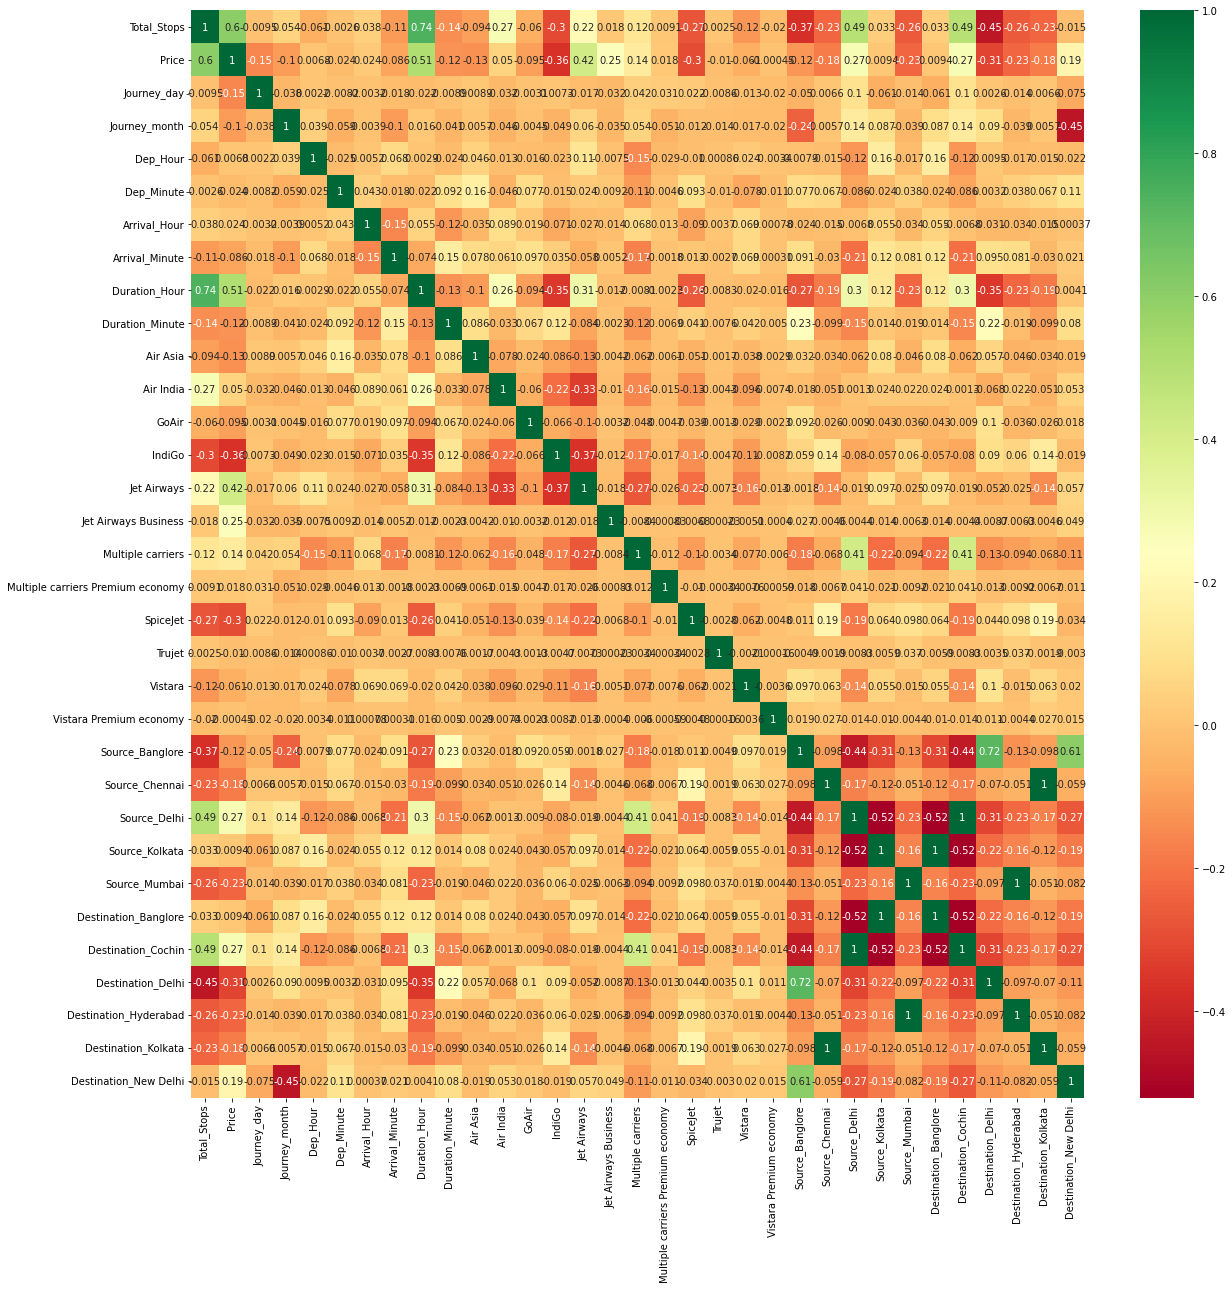

In [70]:
# We will see correlation between indepentent variable and Dependent variable.
plt.figure(figsize=(20,20))
sns.heatmap(final_train.corr(),annot=True ,cmap="RdYlGn")

In [71]:
# We can chech Multicolinearity using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [72]:
print(selection.feature_importances_)

[2.20632139e-01 1.44143645e-01 5.22920293e-02 2.42840296e-02
 2.08989536e-02 2.83153403e-02 1.90564338e-02 1.27458070e-01
 1.72260981e-02 2.20901382e-03 9.15084039e-03 1.96222363e-03
 1.89124447e-02 1.39463312e-01 6.75373408e-02 1.68414683e-02
 8.07527705e-04 3.36469347e-03 1.01227836e-04 4.75965910e-03
 7.98880783e-05 7.75597151e-03 3.93509950e-04 9.60636746e-03
 1.89893659e-03 5.64159595e-03 2.08950564e-03 1.01979292e-02
 1.62273087e-02 8.25279449e-03 5.15111686e-04 1.79245892e-02]


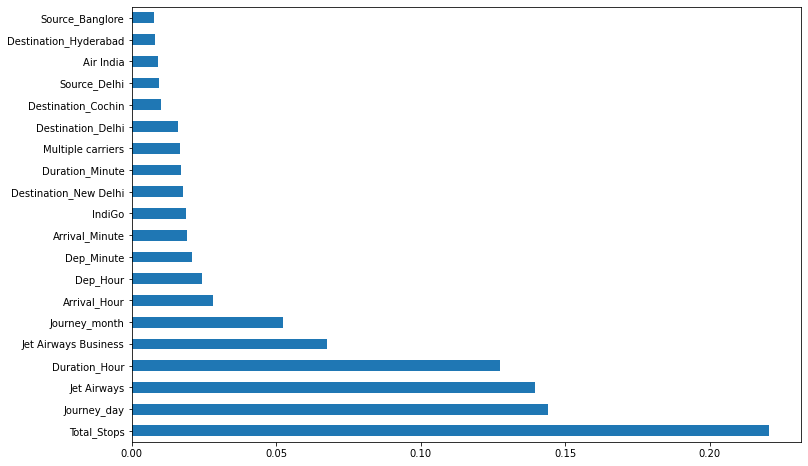

In [73]:
# To show the important features
plt.figure(figsize=(12,8))
feature_importances=pd.Series(selection.feature_importances_,index=x.columns)
feature_importances.nlargest(20).plot(kind="barh")
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
y_pred=reg_rf.predict(x_test)

In [77]:
# R^2 value
reg_rf.score(x_test,y_test)

0.8035085329061872

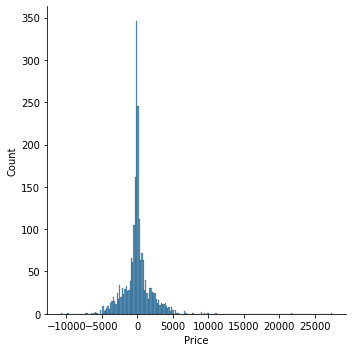

In [78]:
sns.displot(y_test-y_pred)

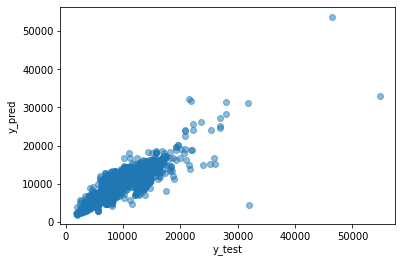

In [79]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [80]:
from sklearn import metrics

In [81]:
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  1200.0056964164105
MSE :  3966823.762061325
RMSE :  1991.6886709677608


In [82]:
metrics.r2_score(y_test,y_pred)

0.8035085329061872

Hyperparameter tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [84]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [85]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [86]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


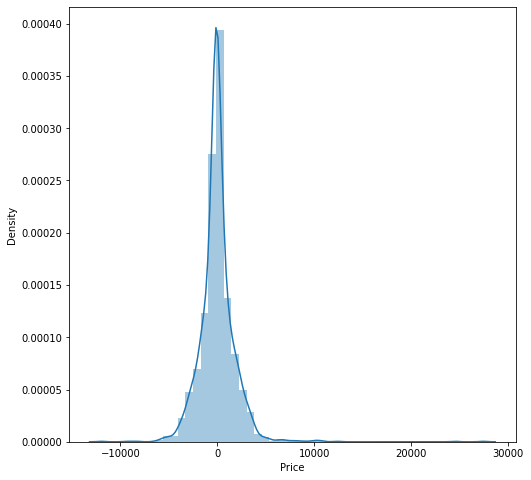

In [88]:
prediction = rf_random.predict(x_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

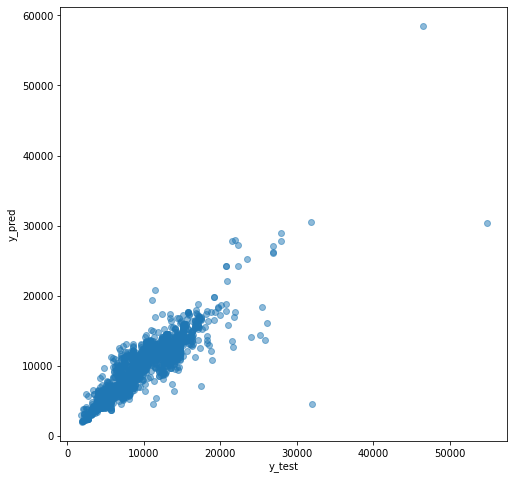

In [89]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 1157.814318154668
MSE: 3606277.106810795
RMSE: 1899.0200385490393


Save the Model

In [91]:
import pickle
file=open("Flight_model.pkl","wb")
pickle.dump(reg_rf,file)

In [92]:
model=open("Flight_model.pkl","rb")
forest=pickle.load(model)

In [93]:
y_prediction = forest.predict(x_test)

In [94]:
metrics.r2_score(y_test, y_prediction)


0.8035085329061872